In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = yf.download("^RUA", "2010-01-01", "2017-12-31")
train.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,1589.069946,1589.699951,1585.420044,1588.250000,1588.250000,0
2017-12-26,1587.520020,1588.300049,1585.630005,1587.000000,1587.000000,0
2017-12-27,1587.189941,1590.280029,1586.300049,1588.160034,1588.160034,0
2017-12-28,1588.609985,1591.530029,1587.949951,1591.449951,1591.449951,0
2017-12-29,1591.959961,1594.150024,1582.770020,1582.770020,1582.770020,0


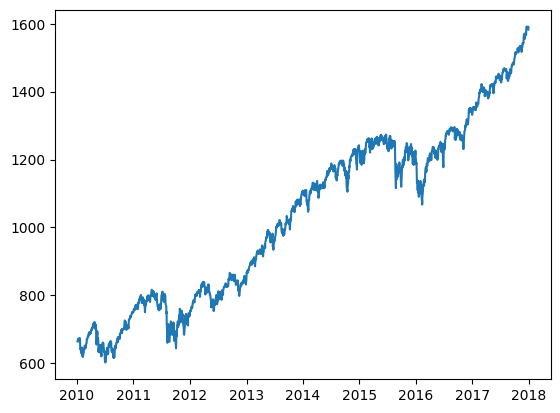

In [3]:
plt.plot(train['Close'])

In [4]:
status = np.log(train['Close']/train['Close'].shift(1)).dropna().values
status = np.append(status, 0)

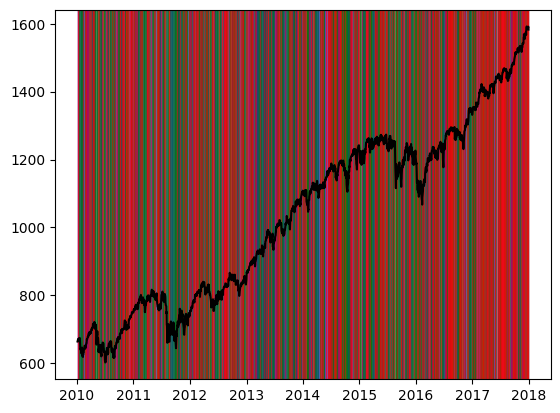

In [12]:
fig, ax = plt.subplots()
x = train.index.values
y = status
ax.plot(x, train['Close'], color='black')

ax.fill_between(x, 0, 1, where=y > 0.0015,
                color='blue', alpha=0.5, transform=ax.get_xaxis_transform())
ax.fill_between(x, 0, 1, where=y < -0.0015,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())
ax.fill_between(x, 0, 1, where=abs(y)<0.0015,
                color='red', alpha=0.5, transform=ax.get_xaxis_transform())

In [6]:
R1 = yf.download("^RUI", "2010-01-01", "2017-12-31")
R2 = yf.download("^RUT", "2010-01-01", "2017-12-31")
R3 = yf.download("^RUA", "2010-01-01", "2017-12-31")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


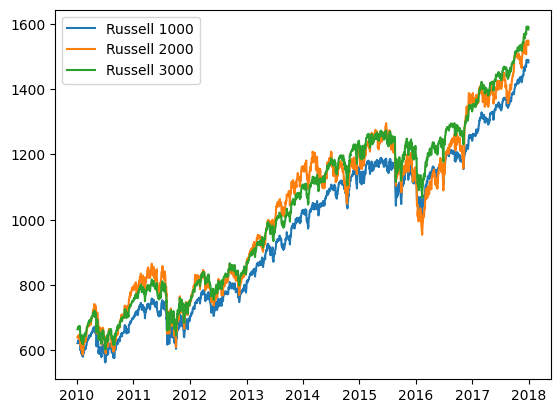

In [7]:
plt.plot(R1['Close'], label='Russell 1000')
plt.plot(R2['Close'], label='Russell 2000')
plt.plot(R3['Close'], label='Russell 3000')
plt.legend()
plt.show()

In [21]:
import pandas as pd


features = yf.download("^RUA", "2010-01-01", "2017-12-31")

window_size = 20
# 计算移动平均
features['movingaverage'] = features['Close'].rolling(window=window_size).mean()

# 计算移动平均的百分比变化
features['pct_close'] = features['movingaverage'].pct_change()

# 根据条件设置 'label' 列
features['label'] = features['pct_close'].apply(lambda x: 1 if x > 0.00012 else (-1 if x < -0.00012 else 0))

[*********************100%%**********************]  1 of 1 completed


C:\Users\Zaichuan\AppData\Local\Temp\ipykernel_52404\4091452036.py:11: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  features['pct_close'] = features['movingaverage'].pct_change()


In [22]:
y=features['label'].values
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{-1: 615, 0: 121, 1: 1277}

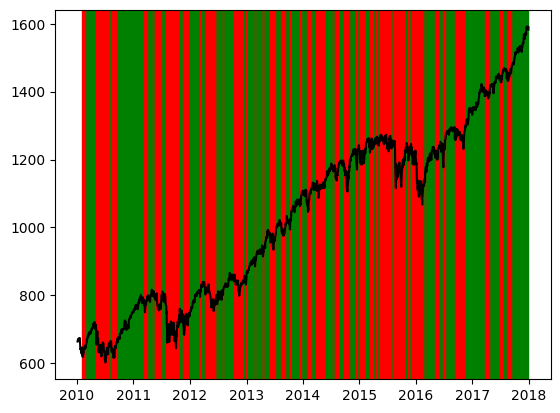

In [28]:
fig, ax = plt.subplots()
x = features.index.values
ax.plot(x, features['Close'], color='black')

ax.fill_between(x, 0, 1, where=y == 1,
                color='green', alpha=1, transform=ax.get_xaxis_transform())
ax.fill_between(x, 0, 1, where=y == -1,
                color='red', alpha=1, transform=ax.get_xaxis_transform())